In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import seaborn as sns
import scipy

np.set_printoptions(linewidth=np.inf,threshold=np.inf)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA


In [3]:
voice_features = pd.read_csv("voice_feature_20241022.csv")
voice_features = voice_features.dropna()
age_name = ['teens', 'twenties','thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties','nineties']
age_value = range(1,10)
age_dict = dict(zip(age_name, age_value))
voice_features['age'] = voice_features['age'].map(age_dict)

In [4]:
col_list_mfcc = ['mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03', 'mfcc_04', 'mfcc_05',
       'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17',
       'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23',
       'mfcc_24']
col_list_f0 = ['f0_mean', 'f0_std','f0_var','f0_min','f0_max','f0_skew', 'f0_kurtosis']
col_list_zcr = ['zcr_mean','zcr_std','zcr_var','zcr_min','zcr_max','zcr_skew','zcr_kurtosis']

We use permutations to create 5 feature sets based on the three existing feature sets.

In [5]:
# combine there columns to make five feature sets
feature_sets = {
    "mfcc": col_list_mfcc,
    "f0": col_list_f0,
    "zcr": col_list_zcr,
    "mfcc+f0": col_list_mfcc + col_list_f0,
    "mfcc+f0+zcr": col_list_mfcc + col_list_f0 + col_list_zcr,
}

In [6]:
# Encode target column
target_column = "age"
voice_features_cleaned = voice_features.dropna(subset=[target_column])
label_encoder = LabelEncoder()
voice_features_cleaned[target_column] = label_encoder.fit_transform(voice_features_cleaned[target_column])

# Initialize scaler
scaler = StandardScaler()

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
}

results = []



To shorten the code, use loops to print all the confusion matrices:

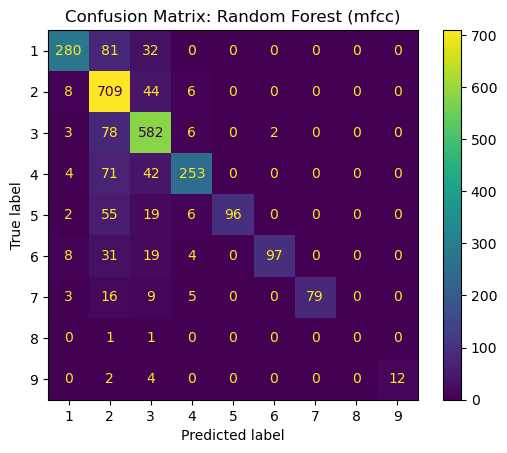

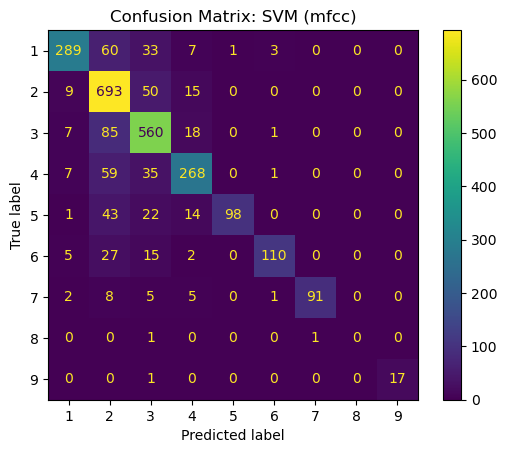

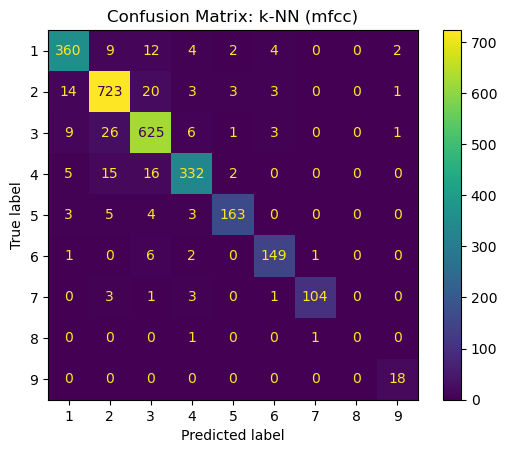

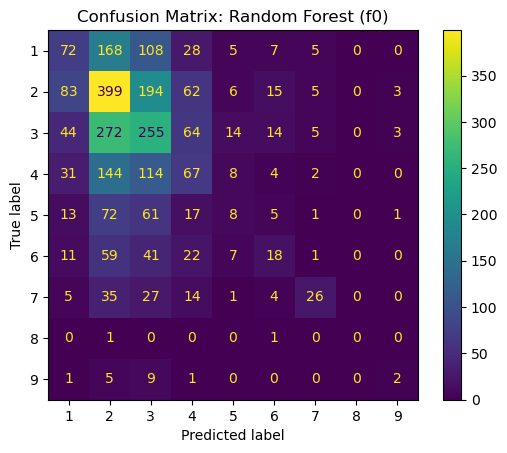

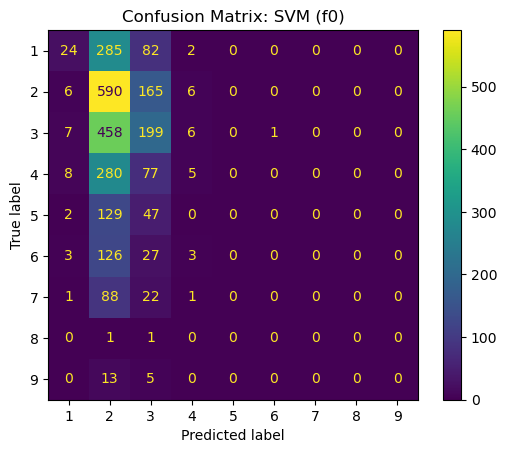

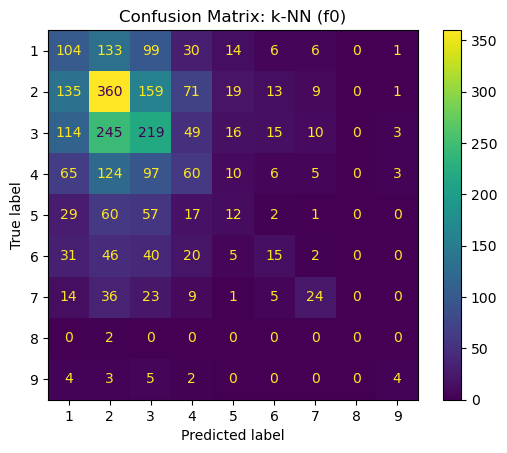

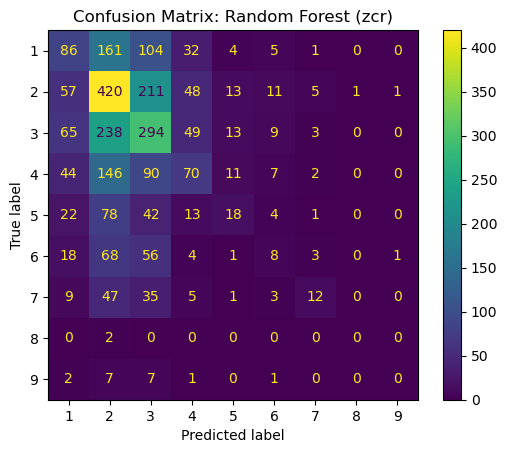

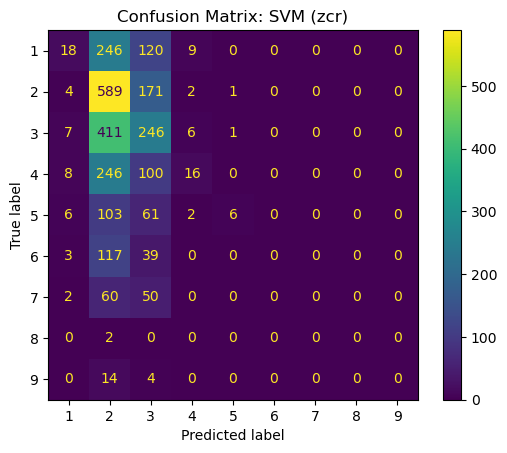

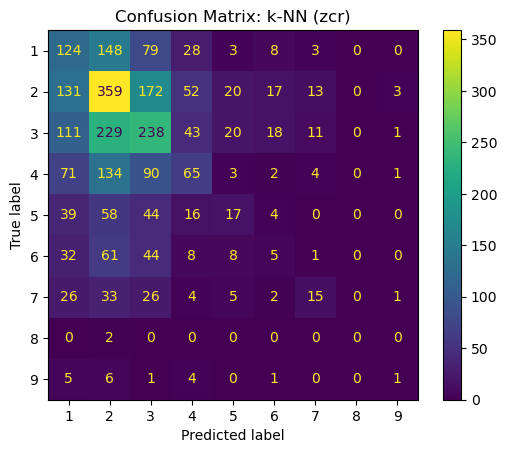

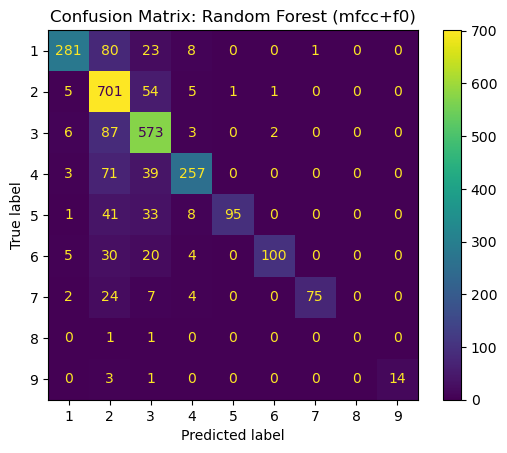

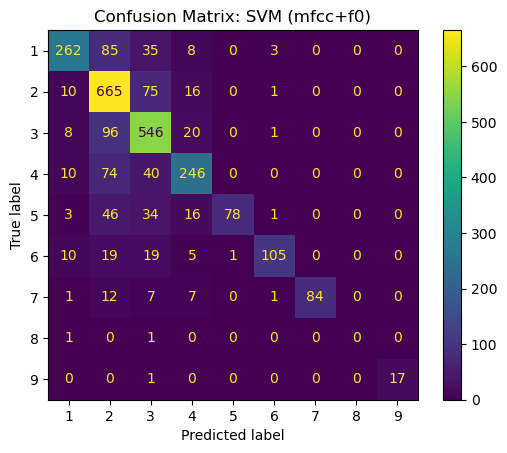

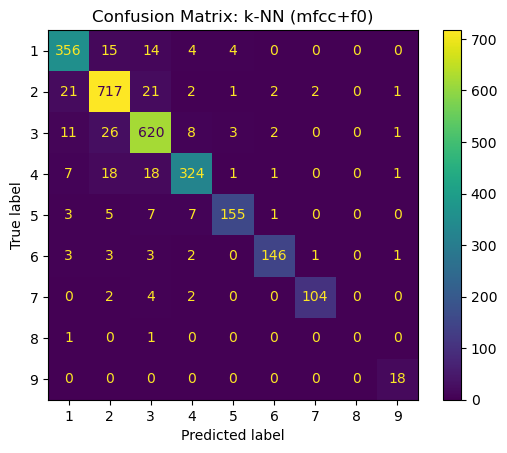

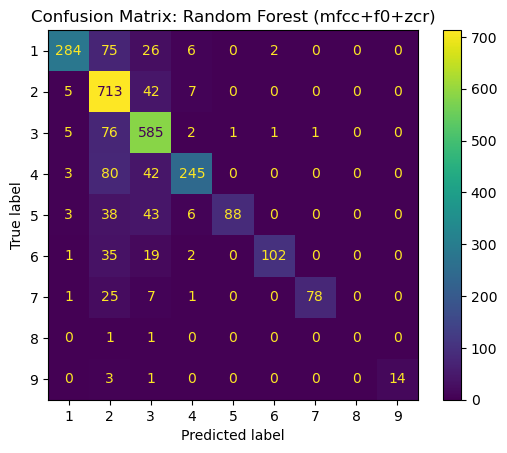

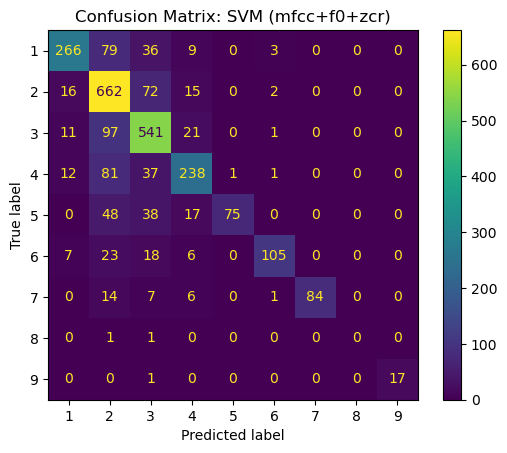

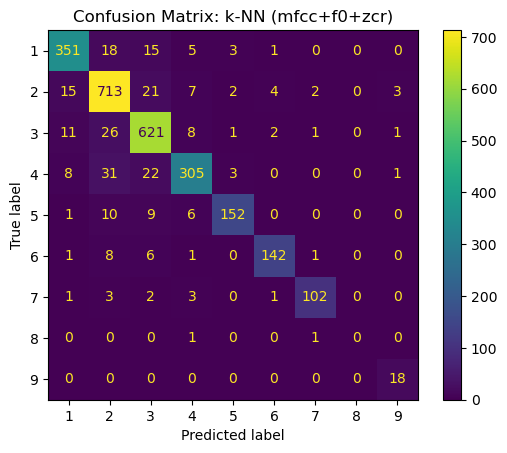

In [7]:
# Iterate through each feature set
for feature_name, features in feature_sets.items():
    # Extract features and scale
    X = voice_features_cleaned[features]
    y = voice_features_cleaned[target_column]
    X_scaled = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    for clf_name, clf in classifiers.items():
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict
        y_pred = clf.predict(X_test)
        
        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # Save results
        results.append({"Feature Set": feature_name, "Classifier": clf_name, "Accuracy": accuracy})
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
        disp.plot(cmap="viridis")
        plt.title(f"Confusion Matrix: {clf_name} ({feature_name})")
        plt.show()


Using a pivot table to consolidate the results:

In [11]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results for easier viewing
print(results_df.pivot(index="Feature Set", columns="Classifier", values="Accuracy"))


Classifier   Random Forest       SVM      k-NN
Feature Set                                   
f0                0.317228  0.306367  0.298876
mfcc              0.789513  0.796255  0.926592
mfcc+f0           0.785019  0.750187  0.913858
mfcc+f0+zcr       0.789888  0.744569  0.900375
zcr               0.340075  0.327715  0.308614


According to the pivot table above, mfcc has the best accuracy.